In [3]:
import yt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import colormaps
import scipy
import pandas as pd
import os
import glob
from astropy.cosmology import FlatLambdaCDM
import pickle
yt.set_log_level(50)

In [1]:
# YT details
# ----------
# Field list: print('\n'.join(str(field) for field in ds.field_list)) # if field[0]=='io')) field_list or derived_field_list
# Field types
#   default: all, gravity, io, nbody, ramses or ramses-rt, sink
#   derived: 'gas', 'index', 'rt', 'deposit'
# Field names:
#      ramses: Density, HI, HII, HeII, HeIII, Metallicity, Pressure, x/y/z-velocity
#          io: particle_identity, particle_mass, particle_position_x/y/z, particle_velocity_x/y/z, 
#                   pre -2017: particle_extra_field_1/2/.., particle_refinement_level
#                   post-2017: conformal_birth_time, particle_birth_time, particle_family, particle_level, particle_mass, particle_metallicity, particle_tag
#   ramses-rt: Photon_density_1/.../6, Photon_flux_x/y/z_1-6
#     gravity: Potential, x/y/z-acceleration, y-acceleration, z-acceleration

# Not sure if sink are correct.

In [1]:
import yt
import numpy as np
from yt.data_objects.particle_filters import add_particle_filter
from matplotlib import pyplot as plt
import logging
yt.funcs.mylog.setLevel(logging.ERROR)


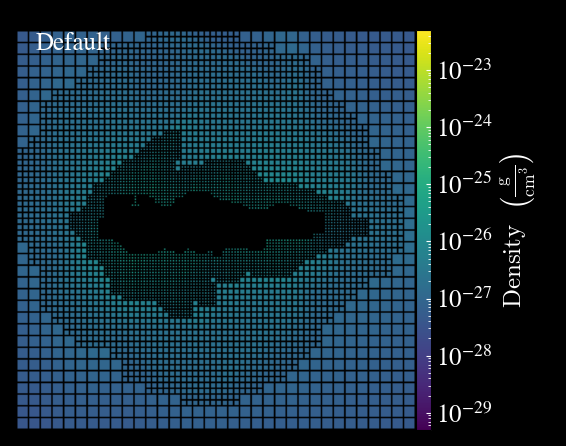


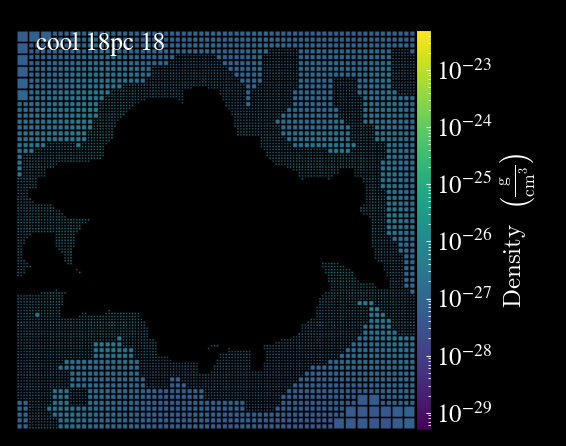


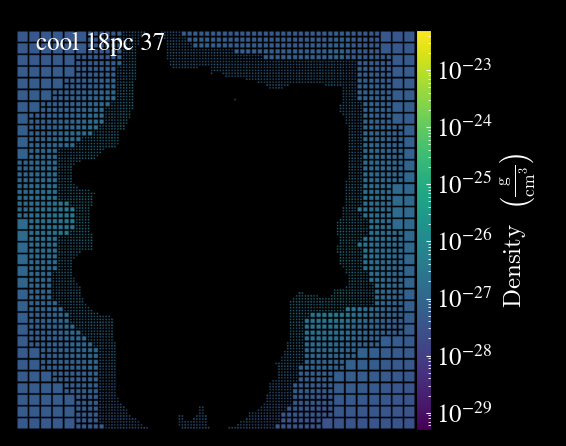


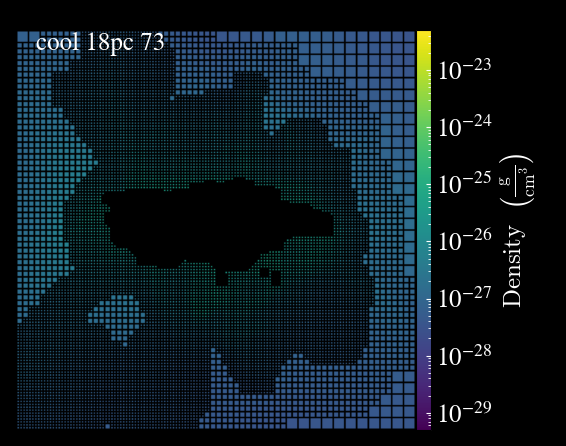

In [7]:
plt.rcParams['figure.facecolor']='k'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
# TK = '/minkewhale/kimm/rey/G8_normal/'
# G8_GTT  = ['GTT_18pc/', 'GTT_9pc/', 'GTT_4pc/']
# G8_SINK = ['SINK_18pc/', 'SINK_9pc/', 'SINK_4pc/']
G8_cool_old = ['cool_18pc_18/', 'cool_18pc_37/', 'cool_18pc_73/']
snap=142
proj='x'
qty = 'density'
for folder in ['Default/']+G8_cool_old:
    RamsesDir = '/minkewhale/mrey/outputs/3_CGxM_ircm3/'+folder
    if folder=='Default/':
        RamsesDir = '/minkewhale/kimm/rey/G8_normal/SINK_18pc_ircm3/'
    # RamsesDir = TK+folder
    ds = yt.load(f'{RamsesDir}/output_{snap:05d}/info_{snap:05d}.txt')
    # p1 = yt.ProjectionPlot(ds, proj, qty, weight_field='density',width=(150,'kpc'))#, width=ds.domain_width[0])
    p1 = yt.ProjectionPlot(ds, proj, qty, weight_field='density',width=(10,'kpc'))#, width=ds.domain_width[0])
    p1.annotate_cell_edges()
    p1.set_cmap(field='density', cmap='viridis')
    p1.set_zlim('density', 5e-30, 5e-23) # colorbar limits
    p1.annotate_text((0.05, 0.95), folder[:-1].replace('_', ' '), coord_system='axis', text_args={'color': 'white', 'fontsize': 12})
    p1.hide_axes()
    if False:
        p1.hide_colorbar()
        p1.save(f'CGxM/maps/map_{proj}_{qty}_{folder[:-1]}_{snap:05d}.pdf')
    else:
        p1.set_figure_size(4)
        p1.show()

In [7]:
ad=ds.all_data()
m_tot = np.sum(ad['density']*ad['dx']**3)
print("The total gas mass is ","{:.2E}".format(m_tot.in_units('Msun')))

yt : [INFO     ] 2024-08-20 18:17:50,526 Detected RAMSES-RT file WITH IR trapping.
yt : [WARNING  ] 2024-08-20 18:17:50,679 Detected 3 extra particle fields assuming kind `double`. Consider using the `extra_particle_fields` keyword argument if you have unexpected behavior.
yt : [WARNING  ] 2024-08-20 18:18:02,817 This cooling file format is no longer supported. Cooling field loading skipped.


The total gas mass is  2.71E+08 Msun


yt : [INFO     ] 2019-12-13 09:49:06,659 Projection completed
yt : [INFO     ] 2019-12-13 09:49:06,660 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-12-13 09:49:06,661 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-12-13 09:49:06,662 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-12-13 09:49:06,662 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-12-13 09:49:06,663 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



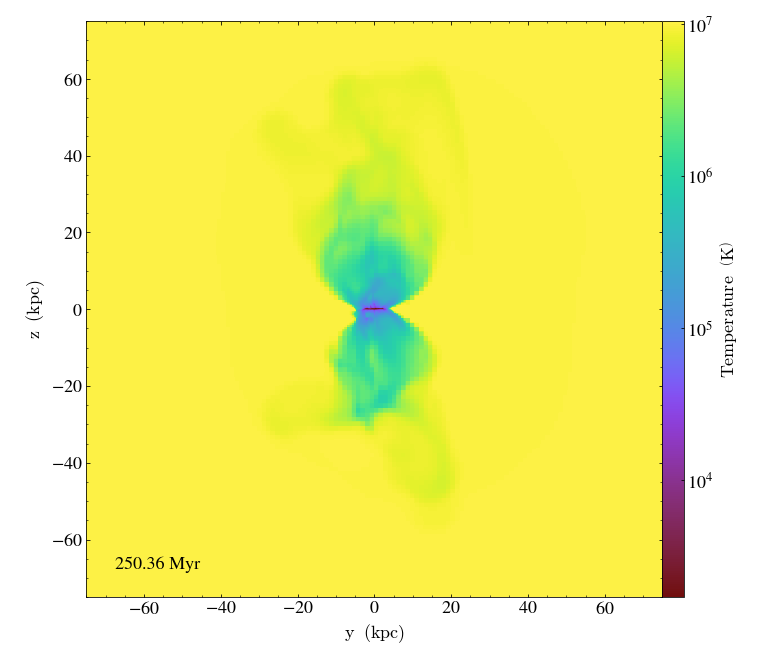

yt : [INFO     ] 2019-12-13 09:49:11,015 Projection completed
yt : [INFO     ] 2019-12-13 09:49:11,015 xlim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:11,016 ylim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:11,016 xlim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:11,017 ylim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:11,017 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



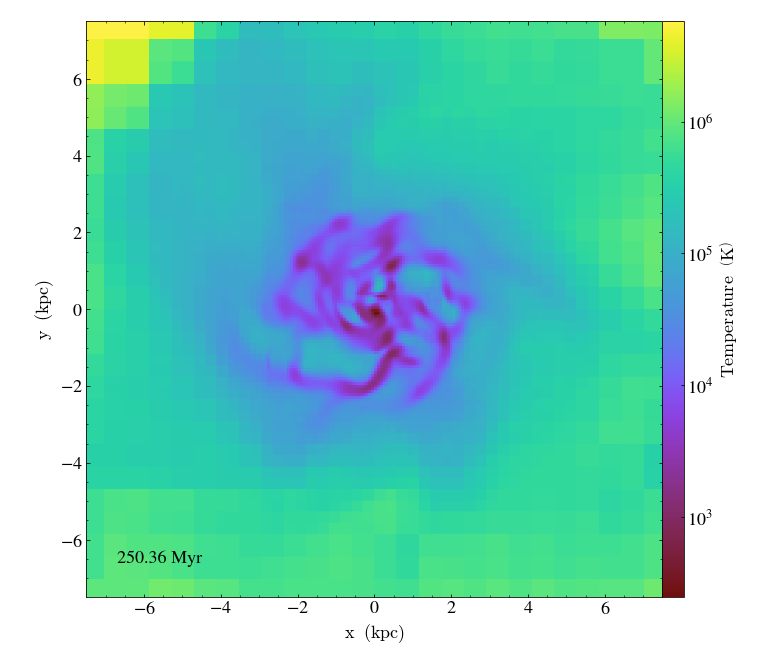

In [5]:
# Show projection maps
# 1 - projection of the full box
p1 = yt.ProjectionPlot(ds, 'x', 'temperature',weight_field='density')
p1.annotate_text([0.05,0.05,0.05],time_Myr,text_args={'color':'black'})
p1.show()
#p1.save('img/side_view/')

p2 = yt.ProjectionPlot(ds, 'z', 'temperature',weight_field='density',width=(15,'kpc'))
p2.annotate_text([0.15,0.15],time_Myr,text_args={'color':'black'}, coord_system='figure')
p2.show()
#p2.save('img/topview/')

yt : [INFO     ] 2019-12-13 09:49:13,981 Projection completed
yt : [INFO     ] 2019-12-13 09:49:13,981 xlim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:13,982 ylim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:13,983 xlim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:13,983 ylim = 0.450000 0.550000
yt : [INFO     ] 2019-12-13 09:49:13,984 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



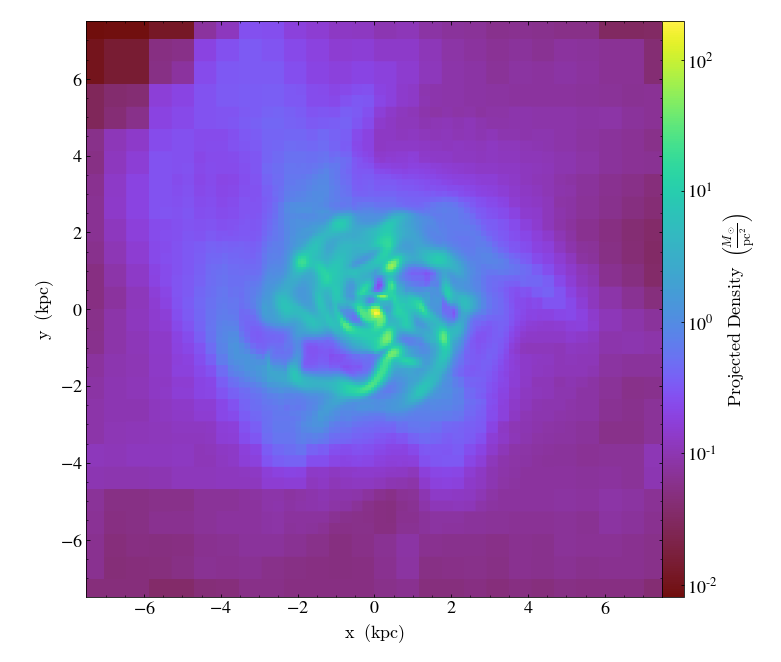

In [6]:
# 1 - zoomed-in projection
p3 = yt.ProjectionPlot(ds, 'z', 'density',width=(15,'kpc'))
p3.set_unit('density', 'Msun/pc**2')
p3.annotate_text([0.05,0.05,0.05],time_Myr,text_args={'color':'black'})
p3.show()

In [7]:
# Plot star formation history

# Useful function
def formed_star(pfilter, data):
    filter = data["all", "particle_birth_time"] > 0
    return filter

add_particle_filter("formed_star", function=formed_star, filtered_type='all',
                    requires=["particle_birth_time"])

In [8]:
# Apply it on the considered dir
ds.add_particle_filter('formed_star')

ad = ds.all_data()
masses = ad['formed_star', 'particle_mass'].in_units('Msun')
formation_time = ad['formed_star', 'particle_birth_time'].in_units('yr')

time_range = [-100, time_yr.v] # years
n_bins = 100
hist, bins = np.histogram(formation_time, bins=n_bins, range=time_range,)
inds = np.digitize(formation_time, bins=bins)
time = (bins[:-1] + bins[1:])/2

sfr = np.array([masses[inds == j+1].sum()/(bins[j+1]-bins[j])
                for j in range(len(time))])
mass = np.array([masses[inds == j+1].sum()
                for j in range(len(time))])
mass= np.cumsum(mass)
#sfr[sfr == 0] = np.nan

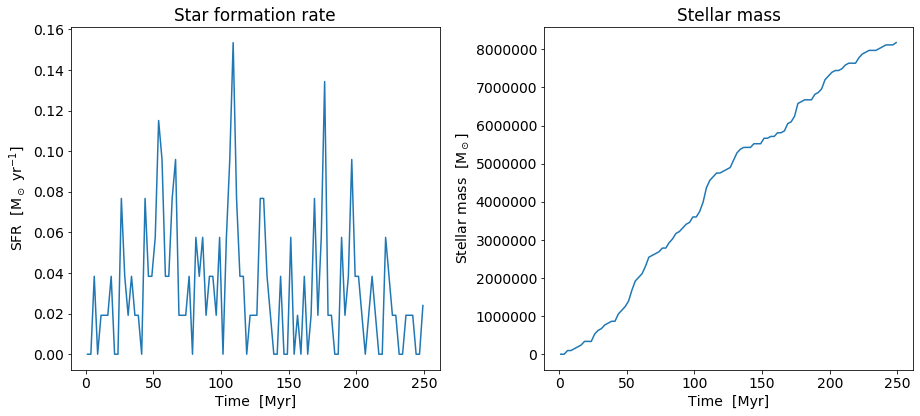

In [9]:
plt.rcParams['font.size'] = 14
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,6))

axes[0].plot(time/1e6, sfr)
axes[0].set_title('Star formation rate')
axes[0].set_xlabel('Time  [Myr]')
axes[0].set_ylabel('SFR  [M$_\odot$ yr$^{-1}$]')

axes[1].plot(time/1e6, mass)
axes[1].set_title('Stellar mass')
axes[1].set_xlabel('Time  [Myr]')
axes[1].set_ylabel('Stellar mass  [M$_\odot$]')

plt.tight_layout()
plt.show()